# Evolucion de la temperatura global en los ultimos 40 años.

### los datos fueron descargados de la plataforma Kaggle

Daily Temperature of Major Cities
https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities

Climate Change: Earth Surface Temperature Data
https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

Global Earth Temperatures
https://www.kaggle.com/datasets/joebeachcapital/global-earth-temperatures?resource=download


Analisis desarrollado por Gerardo Alfonso

In [9]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Cargar el archivo de temperaturas de ciudades (Convertir año, mes y día a formato de fecha, manejando errores)
df_city_temp['Date'] = pd.to_datetime(df_city_temp[['Year', 'Month', 'Day']], errors='coerce')

# Eliminar filas con fechas no válidas (NaT)
df_city_temp = df_city_temp.dropna(subset=['Date'])


# Cargar el archivo de temperaturas globales
df_global_temp = pd.read_csv('global temperatures.csv')
# Renombrar columnas para elimina espacios al inicio y al final de los nombres
df_global_temp.columns = df_global_temp.columns.str.strip()
df_global_temp['Date'] = pd.to_datetime(df_global_temp[['Year', 'Month']].assign(Day=1))


# Cargar el archivo de temperaturas en ciudades globales importantes
df_major_city_temp = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df_major_city_temp['Date'] = pd.to_datetime(df_major_city_temp['dt'])


In [15]:
# Filtrar datos por columnas relevantes
df_city_temp = df_city_temp[['Date', 'Region', 'Country', 'City', 'AvgTemperature']]
df_global_temp = df_global_temp[['Date', 'Annual Anomaly']]
df_major_city_temp = df_major_city_temp[['Date', 'City', 'AverageTemperature']]

In [27]:
# Previsualizacion de los datos
df_city_temp.head(2)

,Date,Region,Country,City,AvgTemperature,Month
0,1995-01-01,Africa,Algeria,Algiers,64.2,1
1,1995-01-02,Africa,Algeria,Algiers,49.4,1


In [28]:
# Previsualizacion de los datos
df_global_temp.head(2)

,Date,Annual Anomaly
0,1850-01-01,NaN
1,1850-02-01,NaN


In [29]:
# Previsualizacion de los datos
df_major_city_temp.head(2)

,Date,City,AverageTemperature
0,1849-01-01,Abidjan,26.704
1,1849-02-01,Abidjan,27.434


In [30]:
# Verificar tipos de datos
print(df_city_temp.dtypes)
print(df_global_temp.dtypes)
print(df_major_city_temp.dtypes)

Date              datetime64[ns]
Region                    object
Country                   object
City                      object
AvgTemperature           float64
Month                      int32
dtype: object
Date              datetime64[ns]
Annual Anomaly            object
dtype: object
Date                  datetime64[ns]
City                          object
AverageTemperature           float64
dtype: object


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'AvgTemperature'}>],
       [<Axes: title={'center': 'Month'}>, <Axes: >]], dtype=object)

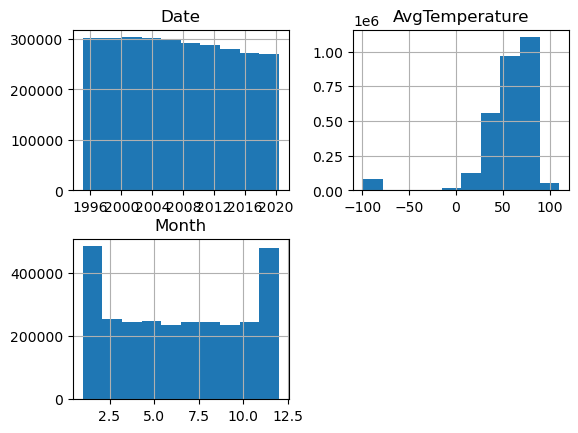

In [31]:
df_city_temp.hist()

array([[<Axes: title={'center': 'Date'}>]], dtype=object)

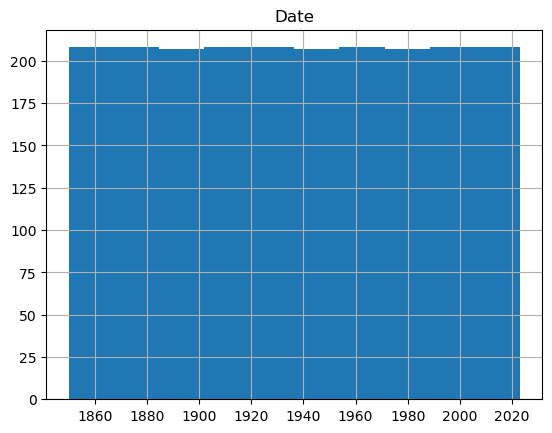

In [32]:
df_global_temp.hist()

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'AverageTemperature'}>]], dtype=object)

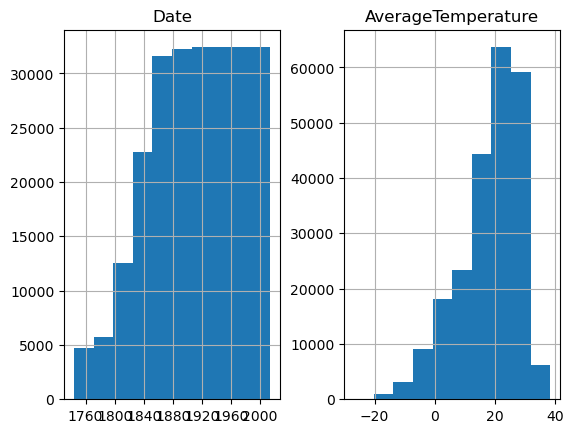

In [33]:
df_major_city_temp.hist()

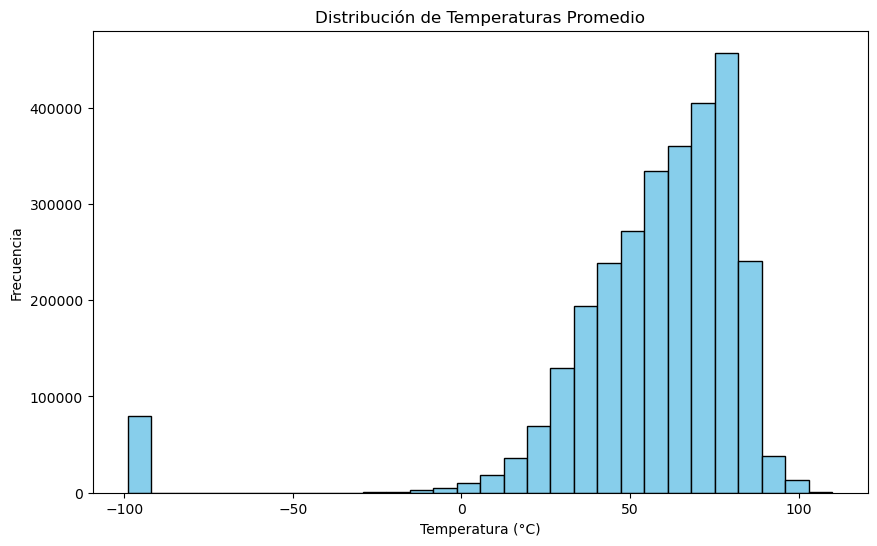

In [23]:
# Histograma de Frecuencia, verificar sesgos o datos anomalos en el dataset

plt.figure(figsize=(10, 6))
plt.hist(df_city_temp['AvgTemperature'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Temperaturas Promedio')
plt.show()


<Figure size 1200x600 with 0 Axes>

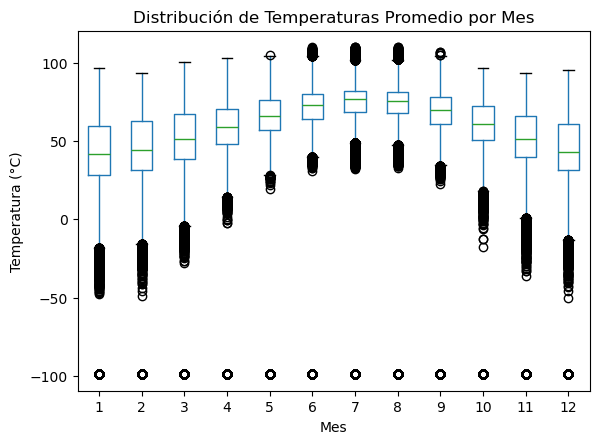

In [24]:
# Box plot por mes, nos permite visualizar la variacion de la temperatura a lo largo de los meses del año historicamente.

df_city_temp['Month'] = pd.to_datetime(df_city_temp['Date']).dt.month
plt.figure(figsize=(12, 6))
df_city_temp.boxplot(column='AvgTemperature', by='Month', grid=False)
plt.xlabel('Mes')
plt.ylabel('Temperatura (°C)')
plt.title('Distribución de Temperaturas Promedio por Mes')
plt.suptitle('')
plt.show()


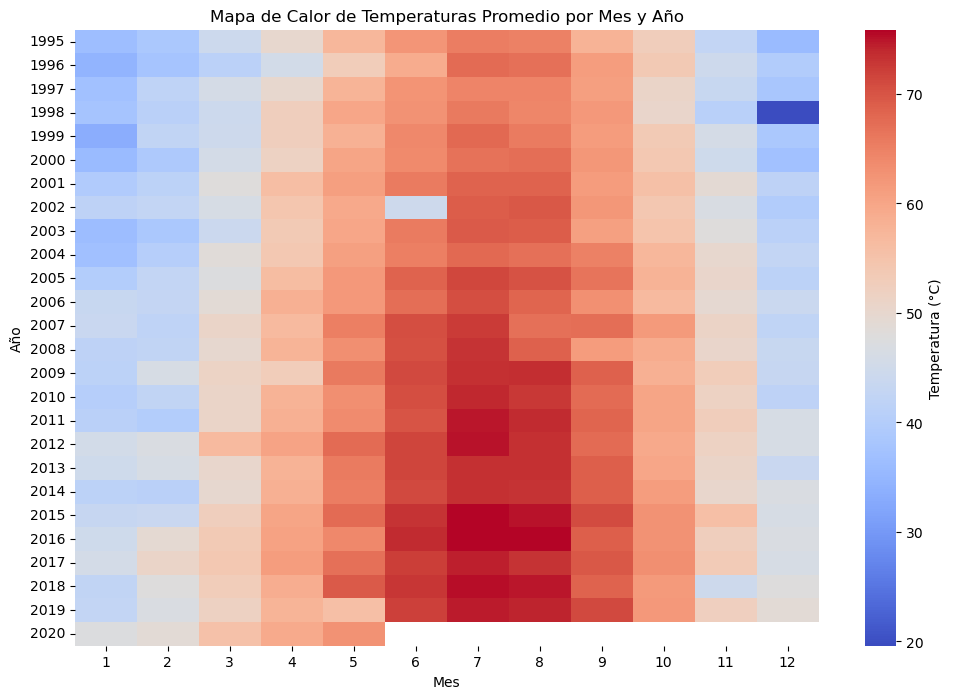

In [25]:
# Crear una tabla pivot para el heatmap
heatmap_data = df_city_temp.pivot_table(values='AvgTemperature', index=df_city_temp['Date'].dt.year, columns=df_city_temp['Date'].dt.month)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Temperatura (°C)'})
plt.xlabel('Mes')
plt.ylabel('Año')
plt.title('Mapa de Calor de Temperaturas Promedio por Mes y Año')
plt.show()


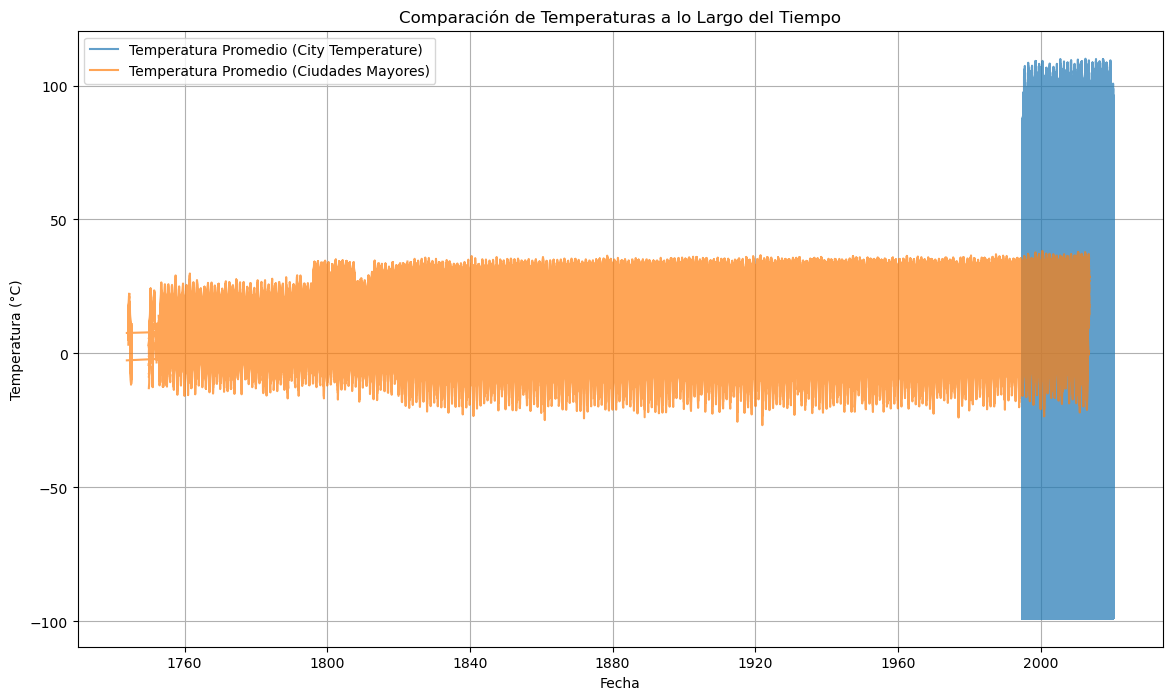

In [22]:
plt.figure(figsize=(14, 8))

# Gráfico 1: Temperaturas de la ciudad
plt.plot(df_city_temp['Date'], df_city_temp['AvgTemperature'], label='Temperatura Promedio (City Temperature)', alpha=0.7)

# Gráfico 2: Anomalías de temperatura global anual
# plt.plot(df_global_temp['Date'], df_global_temp['Annual Anomaly'], label='Anomalía Anual (Global Temperatures)', alpha=0.7)

# Gráfico 3: Temperaturas en ciudades principales
plt.plot(df_major_city_temp['Date'], df_major_city_temp['AverageTemperature'], label='Temperatura Promedio (Ciudades Mayores)', alpha=0.7)

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.title('Comparación de Temperaturas a lo Largo del Tiempo')
plt.legend()
plt.grid(True)

plt.show()


* Concluciones

Se realizo un análisis de tipo Exploratorio del los dataset para conocer a detalle las distintas variables y se puede determinar que

Tendencias Globales y Locales
Aumento de Temperaturas Globales: El análisis de las anomalías de temperatura global revela una tendencia al alza a lo largo de los años, lo que puede estar relacionado con el cambio climático global. La anomalía anual y las anomalías de 5 y 10 años muestran que las temperaturas promedio globales han aumentado significativamente desde el siglo XX.

Cambio Climático Regional: El análisis de las series temporales de temperaturas de diferentes ciudades puede destacar cómo el cambio climático afecta de manera diferente a distintas regiones. Por ejemplo, áreas cercanas a los polos podrían experimentar un calentamiento más rápido que otras.

